In [ ]:
"""
This notebook generates plots in Fig. 1 of the paper.
For example track plots, please see the example tracks directory.
"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from scipy.stats import pearsonr

from matplotlib.colors import LinearSegmentedColormap
import mpl_scatter_density # needed for density scatter plots
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize

# COLORS:
# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list("white_viridis", [
    (0, "#ffffff"),
    (1e-20, "#440053"),
    (0.2, "#404388"),
    (0.4, "#2a788e"),
    (0.6, "#21a784"),
    (0.8, "#78d151"),
    (1, "#fde624"),
], N=256)
# "Viridis-like" colormap with white background
white_viridis_r = LinearSegmentedColormap.from_list("white_viridis", [
    (0, "#ffffff"),
    (1e-20, "#fde624"),
    (0.4, "#78d151"),
    (0.6, "#21a784"),
    (0.7, "#2a788e"),
    (0.8, "#404388"),
    (1, "#440053"),
], N=256)
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]

In [2]:
# LOAD DATA

SCRATCH = "/Users/adamhe/github/scratch"

# Negative and positive bounds for model performance on correlation
mean_predictor_corr = pd.read_csv(
    os.path.join(SCRATCH, "evaluation_metric/pos_neg_bounds/mean_predictor_corrs.csv.gz"),
    index_col=0,
)
replicate_corr = pd.read_csv(
    os.path.join(SCRATCH, "evaluation_metric/pos_neg_bounds/replicate_pearsons.csv.gz"),
    index_col=0,
)

# Load model predictions
full_pearson = pd.read_csv(
    os.path.join(
        SCRATCH,
        "evaluation_metric/ensemble_test/ensemble_fold_0_pearson.csv.gz",
    ),
    index_col=0,
)

# Subsample
subsample_pearson = pd.read_csv("subsample_run_0_track_corr.csv.gz", index_col=0)

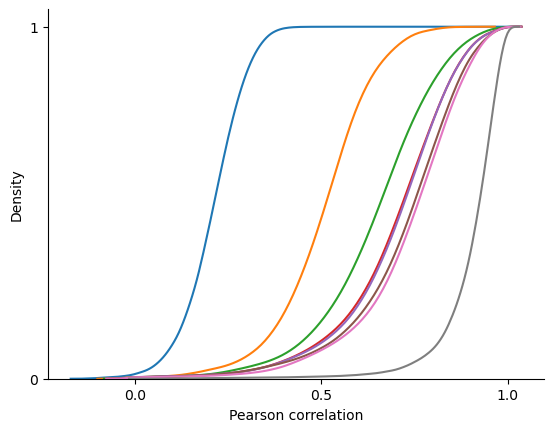

In [4]:
# Plot cdfs of pearson correlations

fig, d = plt.subplots()
sns.kdeplot(list(mean_predictor_corr.mean(axis=0)) + [1], cumulative=True)
sns.kdeplot(subsample_pearson.iloc[:, 0], cumulative=True)
sns.kdeplot(subsample_pearson.iloc[:, 1], cumulative=True)
sns.kdeplot(subsample_pearson.iloc[:, 2], cumulative=True)
sns.kdeplot(subsample_pearson.iloc[:, 3], cumulative=True)
sns.kdeplot(subsample_pearson.iloc[:, 4], cumulative=True)
sns.kdeplot(full_pearson.values.reshape(-1), cumulative=True)
sns.kdeplot(replicate_corr.values.reshape(-1), cumulative=True)

#plt.axvline(np.nanmedian(mean_predictor_corr), 0, 1, color=colors[0], linestyle="--")
#plt.axvline(np.nanmedian(subsample_pearson[0]), 0, 1, color=colors[1], linestyle="--")
#plt.axvline(np.nanmedian(subsample_pearson[1]), 0, 1, color=colors[2], linestyle="--")
#plt.axvline(np.nanmedian(subsample_pearson[2]), 0, 1, color=colors[3], linestyle="--")
#plt.axvline(np.nanmedian(full_pearson), 0, 1, color=colors[4], linestyle="--")
#plt.axvline(np.nanmedian(replicate_corr), 0, 1, color=colors[5], linestyle="--")

d.set_yticks([0, 1])
#d.set_yticklabels(["", ""])
d.set_xticks([0, 0.5, 1])
#d.set_xticklabels(["", "", ""])
d.set_ylabel("Density")
d.set_xlabel("Pearson correlation")
sns.despine()
plt.savefig("subsample_predictions_pearson_cdf.pdf")

In [5]:
performance_over_n = pd.DataFrame(
    {
        "n": [5, 10, 15, 20, 30, 58],
        "pearson": subsample_pearson.median(axis=0).tolist() + [np.nanmedian(full_pearson)]
    }
)

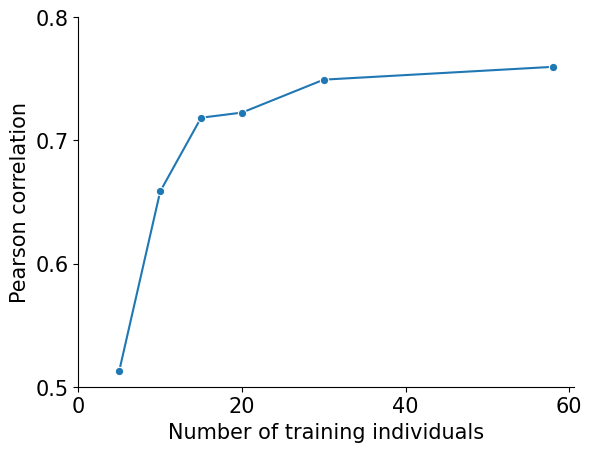

In [11]:
# Plot lineplot of pearson correlations

fig, d = plt.subplots()
sns.lineplot(data=performance_over_n, x="n", y="pearson", marker="o", color=colors[0])
#plt.axvline(np.nanmedian(mean_predictor_corr), 0, 1, color=colors[0], linestyle="--")
#plt.axvline(np.nanmedian(subsample_pearson[0]), 0, 1, color=colors[1], linestyle="--")
#plt.axvline(np.nanmedian(subsample_pearson[1]), 0, 1, color=colors[2], linestyle="--")
#plt.axvline(np.nanmedian(subsample_pearson[2]), 0, 1, color=colors[3], linestyle="--")
#plt.axvline(np.nanmedian(full_pearson), 0, 1, color=colors[4], linestyle="--")
#plt.axvline(np.nanmedian(replicate_corr), 0, 1, color=colors[5], linestyle="--")

d.set_yticks([0.5, 0.6, 0.7, 0.8])
d.set_yticklabels([0.5, 0.6, 0.7, 0.8], fontsize=15)
d.set_xticks([0, 20, 40, 60])
d.set_xticklabels([0, 20, 40, 60], fontsize=15)
d.set_ylabel("Pearson correlation", fontsize=15)
d.set_xlabel("Number of training individuals", fontsize=15)
sns.despine()
#sns.set(font_scale=2)
plt.savefig("subsample_predictions_pearson_lineplot.pdf")

nan